In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
PROJECT_PATH = Path('/home/wak/toprak-lab/aml_drug_synergy')

In [59]:
experiments = ['ETECS02', 'ETECS03']
cell_lines = ['FKH1', 'HL60', 'K562', 'TF1', 'IDH2', 'Kasumi1']

#### Read rawdata

In [60]:
raw = {}
for exp in experiments:
    for line in cell_lines:
        datafile = PROJECT_PATH / 'data/raw' / (exp + ' ' + line + '.txt')
        if datafile.is_file():
            raw[(exp,line)] = pd.read_csv(datafile, sep='\t')
            #print(exp,line,raw[(exp,line)].columns)
merged = pd.concat(raw.values())
merged

,Index,Plate,Plate ID,Row,Column,Compound A,Conc. A [uM],Compound B,Conc. B [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Normalized,Plate Mask
0,1,1,ETECS02 FKH1_1,A,1,SW196654-6,50,SW196654-6,50,Compound,NaN,NaN,13.03.2020 01:48:00,963720.0,-25.443290,NaN
1,2,1,ETECS02 FKH1_1,A,2,SW196654-6,5,SW196654-6,50,Compound,NaN,NaN,13.03.2020 01:48:00,1300880.0,0.640569,NaN
2,3,1,ETECS02 FKH1_1,A,3,SW196654-6,0.5,SW196654-6,50,Compound,NaN,NaN,13.03.2020 01:48:00,1262280.0,-2.345660,NaN
3,4,1,ETECS02 FKH1_1,A,4,SW196654-6,0.05,SW196654-6,50,Compound,NaN,NaN,13.03.2020 01:48:00,1277200.0,-1.191397,NaN
4,5,1,ETECS02 FKH1_1,A,5,SW196654-6,0.005,SW196654-6,50,Compound,NaN,NaN,13.03.2020 01:48:00,1295760.0,0.244469,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,9212,24,ETECS03 Kasumi1_24,P,20,NaN,-,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,2774720.0,47.481660,NaN
9189,9213,24,ETECS03 Kasumi1_24,P,21,NaN,-,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,2819560.0,49.864990,NaN
9190,9214,24,ETECS03 Kasumi1_24,P,22,NaN,-,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,2641640.0,40.408210,NaN
9191,9215,24,ETECS03 Kasumi1_24,P,23,NaN,-,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,3013280.0,60.161580,NaN


In [61]:
len(merged['Plate ID'].unique())

321

In [62]:
drug_names = pd.read_csv(PROJECT_PATH / 'data/meta/Drug_names.txt', sep='\t')
drug_names

,HTS-NAME,SHORT-DRUG-NAME,DRUG-NAME
0,SW196654-6,ATRA,All-trans-retinoic-acid
1,SW197516-3,IDA,Idarubicin
2,SW198953-3,DAU,Daunorubicin
3,SW196745-7,Mito,Mitoxantrone
4,SW197795-10,VP16,Etoposide
5,SW199332-5,AZC,Azacitidine
6,SW199613-2,FLD,Fludarabine
7,SW197450-6,AraC,Cytarabine
8,SW197746-5,2CdA,Cladribine
9,SW198601-4,MTX,Methotrexate


In [63]:
# replace compound names with human-readable names
for i in drug_names.index:
    merged.loc[merged['Compound A'] == drug_names.loc[i,'HTS-NAME'], 'Compound A'] = drug_names.loc[i,'SHORT-DRUG-NAME']
    merged.loc[merged['Compound B'] == drug_names.loc[i,'HTS-NAME'], 'Compound B'] = drug_names.loc[i,'SHORT-DRUG-NAME']

In [64]:
# create cell line column
merged['Cell Line'] = merged['Plate ID'].apply(lambda x: (match.group(1) if (match := re.search('.+?\s+(.+?)[_-]', x)) else ''))
merged['Normalized'] = merged['Normalized'].astype('float')
merged['Conc. A [uM]'] = pd.to_numeric(merged['Conc. A [uM]'], errors='coerce')
merged['Conc. B [uM]'] = pd.to_numeric(merged['Conc. B [uM]'], errors='coerce')

In [65]:
merged.to_csv(PROJECT_PATH / 'data/raw_curated_single_file/ETECS02-ETECS03-combined-raw-data.tsv', sep='\t')
merged

,Index,Plate,Plate ID,Row,Column,Compound A,Conc. A [uM],Compound B,Conc. B [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Normalized,Plate Mask,Cell Line
0,1,1,ETECS02 FKH1_1,A,1,ATRA,50.000,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,963720.0,-25.443290,NaN,FKH1
1,2,1,ETECS02 FKH1_1,A,2,ATRA,5.000,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1300880.0,0.640569,NaN,FKH1
2,3,1,ETECS02 FKH1_1,A,3,ATRA,0.500,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1262280.0,-2.345660,NaN,FKH1
3,4,1,ETECS02 FKH1_1,A,4,ATRA,0.050,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1277200.0,-1.191397,NaN,FKH1
4,5,1,ETECS02 FKH1_1,A,5,ATRA,0.005,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1295760.0,0.244469,NaN,FKH1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,9212,24,ETECS03 Kasumi1_24,P,20,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2774720.0,47.481660,NaN,Kasumi1
9189,9213,24,ETECS03 Kasumi1_24,P,21,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2819560.0,49.864990,NaN,Kasumi1
9190,9214,24,ETECS03 Kasumi1_24,P,22,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2641640.0,40.408210,NaN,Kasumi1
9191,9215,24,ETECS03 Kasumi1_24,P,23,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,3013280.0,60.161580,NaN,Kasumi1


#### Verify combination and control well counts per plate

In [66]:
well_counts=[merged[merged['Plate ID']==plate_id]['Well Type'].value_counts().to_frame(name=plate_id) for plate_id in merged['Plate ID'].unique()]
well_counts = pd.concat(well_counts,axis=1,)
well_counts['well_type'] = well_counts.index
well_counts

/tmp/ipykernel_28454/162392634.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  well_counts['well_type'] = well_counts.index


,ETECS02 FKH1_1,ETECS02 FKH1_2,ETECS02 FKH1_3,ETECS02 FKH1_4,ETECS02 FKH1_5,ETECS02 FKH1_6,ETECS02 FKH1_7,ETECS02 FKH1_8,ETECS02 FKH1_9,ETECS02 FKH1_10,...,ETECS03 Kasumi1_16,ETECS03 Kasumi1_17,ETECS03 Kasumi1_18,ETECS03 Kasumi1_19,ETECS03 Kasumi1_20,ETECS03 Kasumi1_21,ETECS03 Kasumi1_22,ETECS03 Kasumi1_23,ETECS03 Kasumi1_24,well_type
Compound,320,320,320,320,320,320,320,320,320,320,...,336.0,336.0,335.0,336.0,336.0,325.0,336.0,336.0,332.0,Compound
Blank Control,24,24,24,24,24,24,24,24,24,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blank Control
Neutral Control,23,24,24,24,24,24,24,24,24,24,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,Neutral Control
Inhibitor Control,16,16,16,16,16,16,16,16,16,16,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,Inhibitor Control


In [67]:
well_counts_melted = well_counts.melt(id_vars=['well_type'])
well_counts_melted.to_csv(PROJECT_PATH / 'dump/qc/well_types.tsv', sep='\t')
well_counts_melted

,well_type,variable,value
0,Compound,ETECS02 FKH1_1,320.0
1,Blank Control,ETECS02 FKH1_1,24.0
2,Neutral Control,ETECS02 FKH1_1,23.0
3,Inhibitor Control,ETECS02 FKH1_1,16.0
4,Compound,ETECS02 FKH1_2,320.0
...,...,...,...
1279,Inhibitor Control,ETECS03 Kasumi1_23,16.0
1280,Compound,ETECS03 Kasumi1_24,332.0
1281,Blank Control,ETECS03 Kasumi1_24,NaN
1282,Neutral Control,ETECS03 Kasumi1_24,32.0


#### Verify control well values of each plate

In [68]:
merged[merged['Well Type']=='Neutral Control'].groupby(['Plate ID'])['Raw','Normalized'].agg(np.mean)

/tmp/ipykernel_28454/2576740243.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged[merged['Well Type']=='Neutral Control'].groupby(['Plate ID'])['Raw','Normalized'].agg(np.mean)


,Raw,Normalized
Plate ID,,
ETECS02 FKH1_1,1.355802e+06,4.889505
ETECS02 FKH1_10,1.264812e+06,0.365947
ETECS02 FKH1_11,1.422503e+06,1.244348
ETECS02 FKH1_12,1.528805e+06,0.802102
ETECS02 FKH1_13,1.908177e+06,-1.092820
...,...,...
ETECS03 Kasumi1_5,2.472598e+06,1.589938
ETECS03 Kasumi1_6,2.092990e+06,3.385100
ETECS03 Kasumi1_7,2.207538e+06,3.505167


In [69]:
pd.concat([merged[merged['Well Type']=='Inhibitor Control'].groupby(['Plate ID'])['Raw','Normalized'].agg(np.mean),
           merged[merged['Well Type']=='Inhibitor Control'].groupby(['Plate ID'])['Raw','Normalized'].agg(np.std)], axis=1)

/tmp/ipykernel_28454/3123617279.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.concat([merged[merged['Well Type']=='Inhibitor Control'].groupby(['Plate ID'])['Raw','Normalized'].agg(np.mean),
/tmp/ipykernel_28454/3123617279.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged[merged['Well Type']=='Inhibitor Control'].groupby(['Plate ID'])['Raw','Normalized'].agg(np.std)], axis=1)


,Raw,Normalized,Raw,Normalized
Plate ID,,,,
ETECS02 FKH1_1,28317.5,-97.809259,5633.735883,0.435845
ETECS02 FKH1_10,25590.0,-97.969367,3948.913775,0.313357
ETECS02 FKH1_11,25795.0,-98.164086,3556.233963,0.253108
ETECS02 FKH1_12,32177.5,-97.878365,6092.477876,0.401708
ETECS02 FKH1_13,36685.0,-98.098499,7137.773696,0.369975
...,...,...,...,...
ETECS03 Kasumi1_5,40015.0,-98.355929,6021.169322,0.247388
ETECS03 Kasumi1_6,38920.0,-98.077510,5851.295013,0.289031
ETECS03 Kasumi1_7,40232.5,-98.113615,5579.127172,0.261589


In [70]:
inh_controls = merged[(merged['Well Type']=='Inhibitor Control')]
neutral_controls = merged[(merged['Well Type']=='Neutral Control')]
inh_controls

,Index,Plate,Plate ID,Row,Column,Compound A,Conc. A [uM],Compound B,Conc. B [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Normalized,Plate Mask,Cell Line
211,212,1,ETECS02 FKH1_1,I,20,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,13.03.2020 01:48:00,38480.0,-97.02306,NaN,FKH1
212,213,1,ETECS02 FKH1_1,I,21,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,13.03.2020 01:48:00,31760.0,-97.54294,NaN,FKH1
234,236,1,ETECS02 FKH1_1,J,20,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,13.03.2020 01:48:00,34520.0,-97.32941,NaN,FKH1
235,237,1,ETECS02 FKH1_1,J,21,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,13.03.2020 01:48:00,34960.0,-97.29537,NaN,FKH1
258,260,1,ETECS02 FKH1_1,K,20,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,13.03.2020 01:48:00,30720.0,-97.62339,NaN,FKH1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,9136,24,ETECS03 Kasumi1_24,M,16,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,29080.0,-98.45434,NaN,Kasumi1
9113,9137,24,ETECS03 Kasumi1_24,M,17,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,31760.0,-98.31190,NaN,Kasumi1
9114,9138,24,ETECS03 Kasumi1_24,M,18,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,36840.0,-98.04189,NaN,Kasumi1
9115,9139,24,ETECS03 Kasumi1_24,M,19,NaN,NaN,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,39440.0,-97.90369,NaN,Kasumi1


Text(0.5, 1.0, 'ETECS02-ETECS03 Inhibitor Controls')

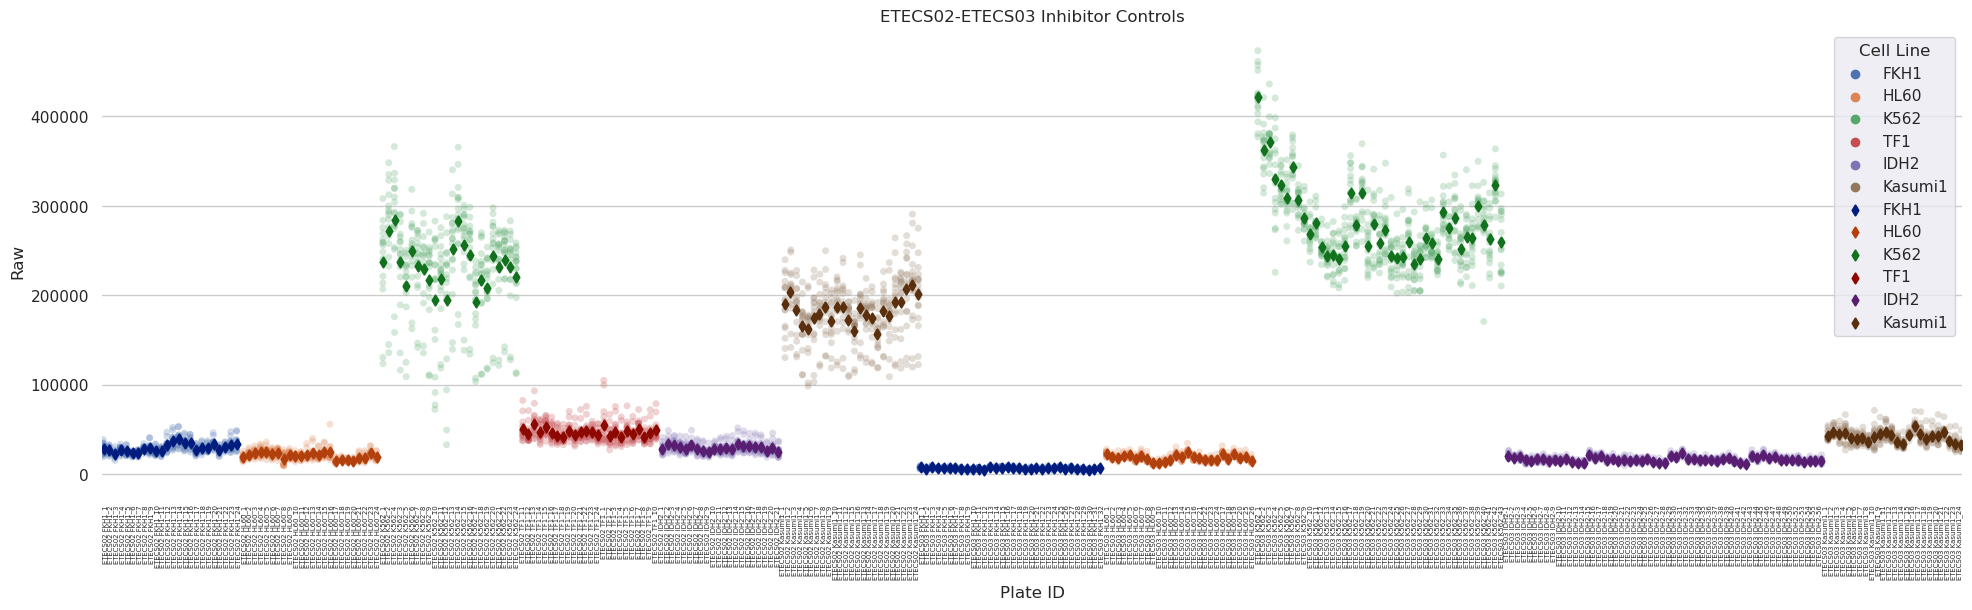

In [71]:
def plot_plate_controls_raw_values(data, x="Plate ID", y="Raw", hue="Cell Line"):
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(24,6))
    sns.despine(bottom=True, left=True)
    sns.set(font_scale=1)
    sns.stripplot(
        data=data, y=y, x=x, hue=hue,
        dodge=True, alpha=.25, zorder=1, legend=True
    )
    sns.pointplot(
        data=data, y=y, x=x, hue=hue,
        join=False, dodge=.8 - .8 / 3, palette='dark',
        markers="d", scale=.75, errorbar=None
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5);
    return ax
ax = plot_plate_controls_raw_values(inh_controls)
ax.set_title('ETECS02-ETECS03 Inhibitor Controls')

Text(0.5, 1.0, 'ETECS02-ETECS03 Neutral Controls')

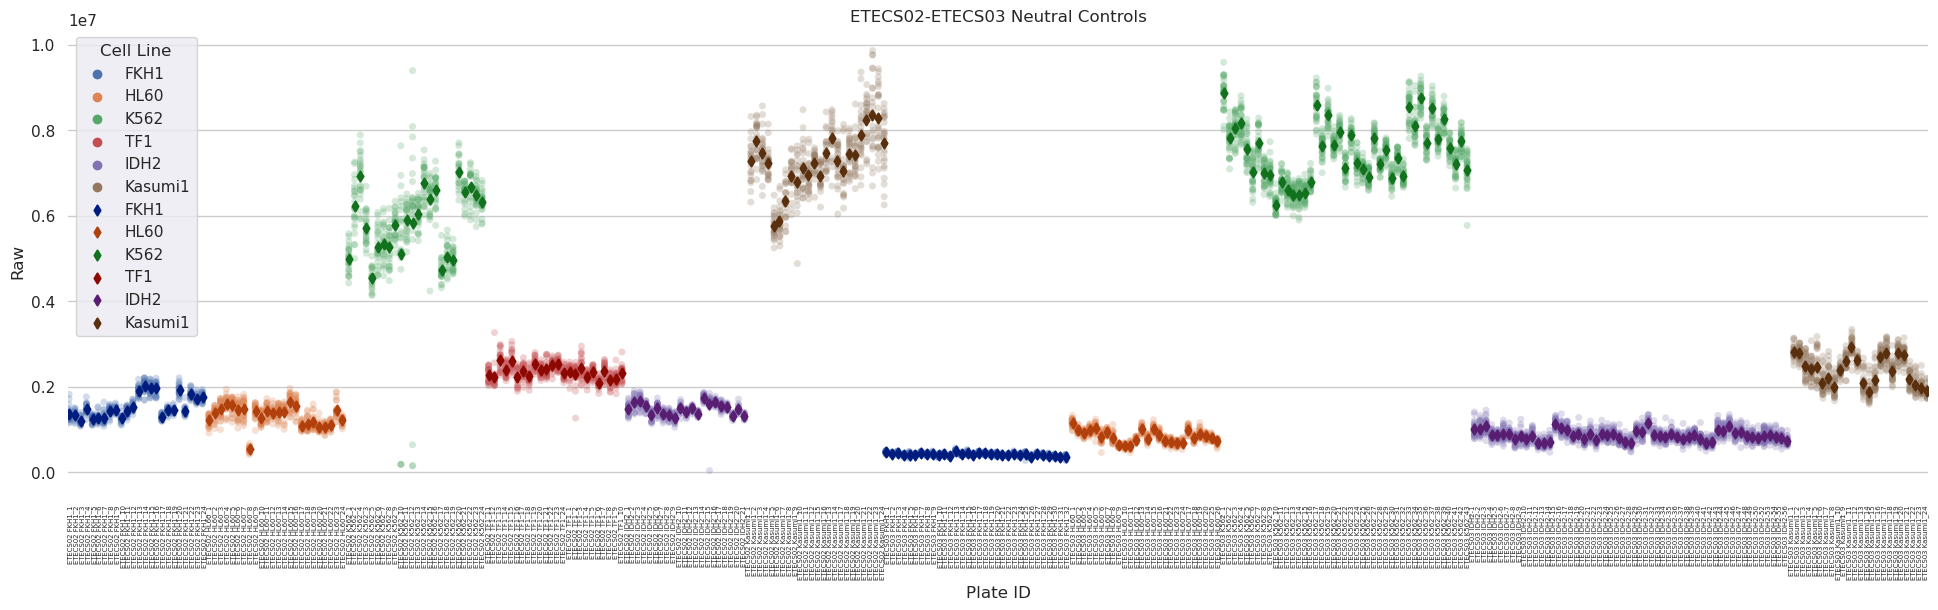

In [72]:
ax = plot_plate_controls_raw_values(neutral_controls)
ax.set_title('ETECS02-ETECS03 Neutral Controls')

In [73]:
merged['Cell Line+Well Type'] = merged['Cell Line']+' '+merged['Well Type']
controls = merged[(merged['Well Type']=='Inhibitor Control') | (merged['Well Type']=='Neutral Control')]

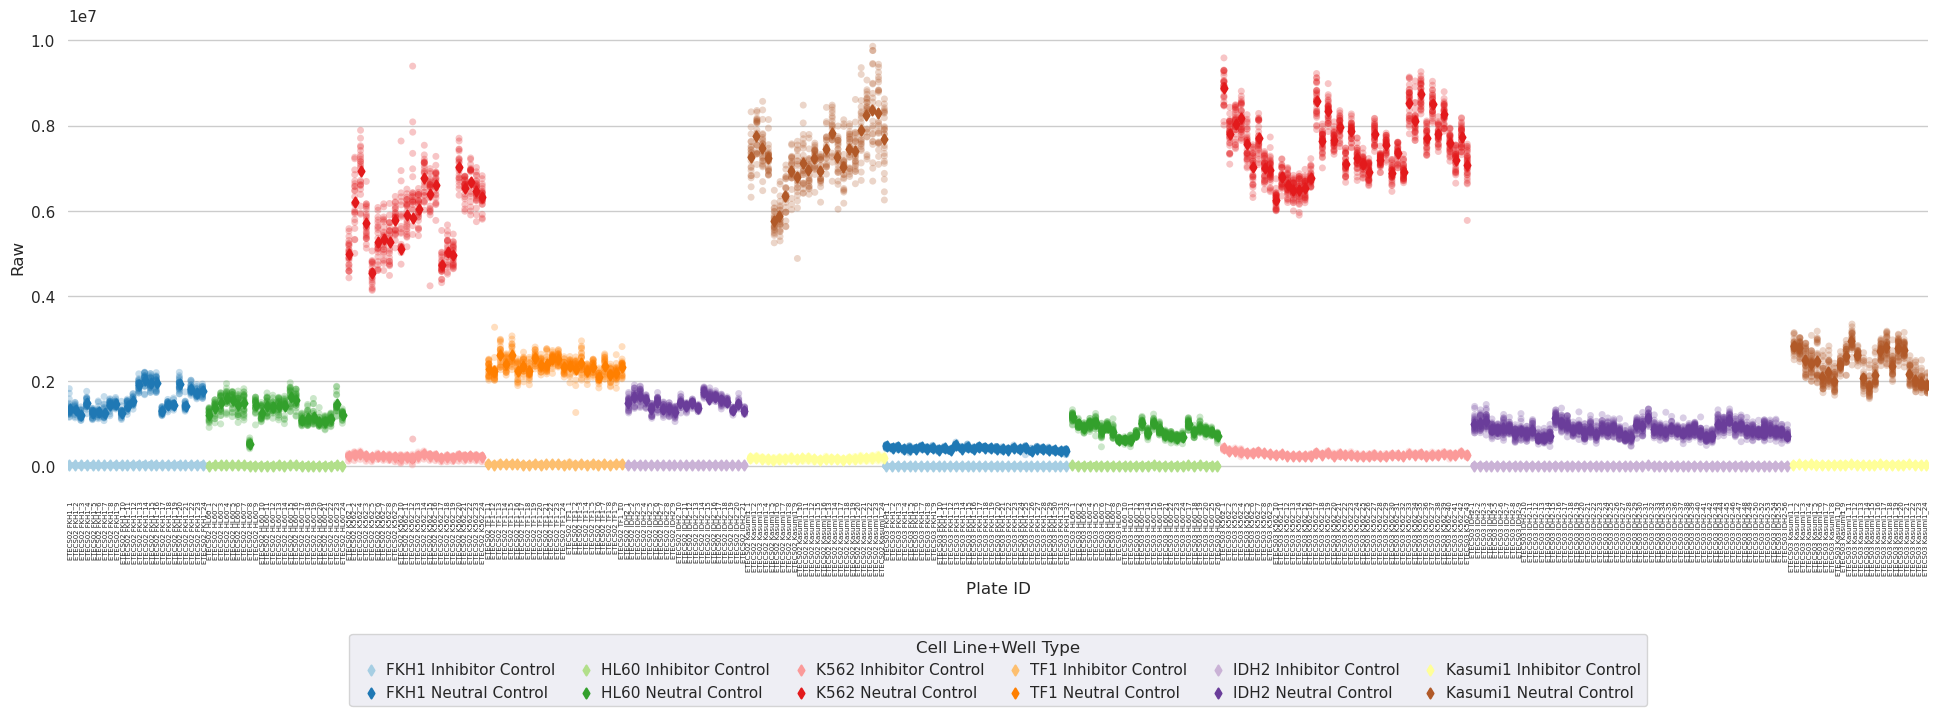

In [74]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(24,6))
sns.despine(bottom=True, left=True)
sns.set(font_scale=1)
sns.stripplot(
    data=controls, y='Raw', x='Plate ID', hue='Cell Line+Well Type', palette='Paired',
    dodge=True, alpha=.25, zorder=1, legend=False
)
sns.pointplot(
    data=controls, y='Raw', x='Plate ID', hue='Cell Line+Well Type',
    join=False, dodge=.8 - .8 / 3, palette='Paired',
    markers="d", scale=.75, errorbar=None
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5);
# Improve the legend
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(.5, -0.3), ncol=6, frameon=True, columnspacing=1, handletextpad=0)

#### Re-normalize based on the median control values

In [75]:
merged.insert(15, 'Normalized2', np.nan)
merged

,Index,Plate,Plate ID,Row,Column,Compound A,Conc. A [uM],Compound B,Conc. B [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Normalized,Normalized2,Plate Mask,Cell Line,Cell Line+Well Type
0,1,1,ETECS02 FKH1_1,A,1,ATRA,50.000,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,963720.0,-25.443290,NaN,NaN,FKH1,FKH1 Compound
1,2,1,ETECS02 FKH1_1,A,2,ATRA,5.000,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1300880.0,0.640569,NaN,NaN,FKH1,FKH1 Compound
2,3,1,ETECS02 FKH1_1,A,3,ATRA,0.500,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1262280.0,-2.345660,NaN,NaN,FKH1,FKH1 Compound
3,4,1,ETECS02 FKH1_1,A,4,ATRA,0.050,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1277200.0,-1.191397,NaN,NaN,FKH1,FKH1 Compound
4,5,1,ETECS02 FKH1_1,A,5,ATRA,0.005,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1295760.0,0.244469,NaN,NaN,FKH1,FKH1 Compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,9212,24,ETECS03 Kasumi1_24,P,20,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2774720.0,47.481660,NaN,NaN,Kasumi1,Kasumi1 Compound
9189,9213,24,ETECS03 Kasumi1_24,P,21,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2819560.0,49.864990,NaN,NaN,Kasumi1,Kasumi1 Compound
9190,9214,24,ETECS03 Kasumi1_24,P,22,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2641640.0,40.408210,NaN,NaN,Kasumi1,Kasumi1 Compound
9191,9215,24,ETECS03 Kasumi1_24,P,23,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,3013280.0,60.161580,NaN,NaN,Kasumi1,Kasumi1 Compound


In [76]:
# Calculate Normalized2: Raw absorbance normalized by median neutral controls per plate
#
for plate_id in merged['Plate ID'].unique():
    plate = merged[merged['Plate ID'] == plate_id]
    neutral_median = np.median(plate.loc[plate['Well Type']=='Neutral Control', 'Raw'].values)
    inhibitor_median = np.median(plate.loc[plate['Well Type']=='Inhibitor Control', 'Raw'].values)
    merged.loc[merged['Plate ID'] == plate_id, 'Normalized2'] = (merged.loc[merged['Plate ID'] == plate_id,'Raw']-inhibitor_median)/(neutral_median-inhibitor_median)
    print(f"{plate_id}\t{neutral_median}\t{inhibitor_median}")

ETECS02 FKH1_1	1292600.0	28520.0
ETECS02 FKH1_2	1331740.0	26720.0
ETECS02 FKH1_3	1181180.0	23140.0
ETECS02 FKH1_4	1455280.0	28820.0
ETECS02 FKH1_5	1268300.0	24900.0
ETECS02 FKH1_6	1284520.0	23280.0
ETECS02 FKH1_7	1236520.0	24360.0
ETECS02 FKH1_8	1447600.0	28800.0
ETECS02 FKH1_9	1452600.0	28920.0
ETECS02 FKH1_10	1260200.0	24280.0
ETECS02 FKH1_11	1405020.0	26160.0
ETECS02 FKH1_12	1516640.0	32460.0
ETECS02 FKH1_13	1929260.0	36300.0
ETECS02 FKH1_14	2076560.0	39580.0
ETECS02 FKH1_15	1926700.0	34660.0
ETECS02 FKH1_16	1987560.0	34280.0
ETECS02 FKH1_17	1298260.0	25840.0
ETECS02 FKH1_18	1438160.0	28600.0
ETECS02 FKH1_19	1452640.0	28980.0
ETECS02 FKH1_20	1932460.0	34280.0
ETECS02 FKH1_21	1415580.0	27400.0
ETECS02 FKH1_22	1815740.0	30560.0
ETECS02 FKH1_23	1705340.0	31880.0
ETECS02 FKH1_24	1765220.0	32380.0
ETECS02 HL60_1	1259360.0	18920.0
ETECS02 HL60_2	1415560.0	21380.0
ETECS02 HL60_3	1555280.0	23220.0
ETECS02 HL60_4	1615520.0	24520.0
ETECS02 HL60_5	1621560.0	24460.0
ETECS02 HL60_6	1522960.0	223

In [77]:
# Make drug pairs strictly lexicographical
# 
def sort_compound_names(row):
    if row['Compound A'] > row['Compound B']:
        A = row['Compound A']
        row['Compound A'] = row['Compound B']
        row['Compound B'] = A
        A = row['Conc. A [uM]']
        row['Conc. A [uM]'] = row['Conc. B [uM]']
        row['Conc. B [uM]'] = A

    return row

sorted = merged.apply(sort_compound_names, axis=1)

In [78]:
# Export final version
#
sorted.to_csv(PROJECT_PATH / 'data/raw_curated_single_file/ETECS02-ETECS03-combined-normalized.tsv', sep='\t', index=False)
sorted

,Index,Plate,Plate ID,Row,Column,Compound A,Conc. A [uM],Compound B,Conc. B [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Normalized,Normalized2,Plate Mask,Cell Line,Cell Line+Well Type
0,1,1,ETECS02 FKH1_1,A,1,ATRA,50.000,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,963720.0,-25.443290,0.739827,NaN,FKH1,FKH1 Compound
1,2,1,ETECS02 FKH1_1,A,2,ATRA,5.000,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1300880.0,0.640569,1.006550,NaN,FKH1,FKH1 Compound
2,3,1,ETECS02 FKH1_1,A,3,ATRA,0.500,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1262280.0,-2.345660,0.976014,NaN,FKH1,FKH1 Compound
3,4,1,ETECS02 FKH1_1,A,4,ATRA,0.050,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1277200.0,-1.191397,0.987817,NaN,FKH1,FKH1 Compound
4,5,1,ETECS02 FKH1_1,A,5,ATRA,0.005,ATRA,50.0,Compound,NaN,NaN,13.03.2020 01:48:00,1295760.0,0.244469,1.002500,NaN,FKH1,FKH1 Compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,9212,24,ETECS03 Kasumi1_24,P,20,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2774720.0,47.481660,1.483074,NaN,Kasumi1,Kasumi1 Compound
9189,9213,24,ETECS03 Kasumi1_24,P,21,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2819560.0,49.864990,1.507322,NaN,Kasumi1,Kasumi1 Compound
9190,9214,24,ETECS03 Kasumi1_24,P,22,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2641640.0,40.408210,1.411109,NaN,Kasumi1,Kasumi1 Compound
9191,9215,24,ETECS03 Kasumi1_24,P,23,NaN,NaN,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,3013280.0,60.161580,1.612078,NaN,Kasumi1,Kasumi1 Compound


#### Visualize Inhibitor/Neutral Controls per plate (normalized from raw absorbance)

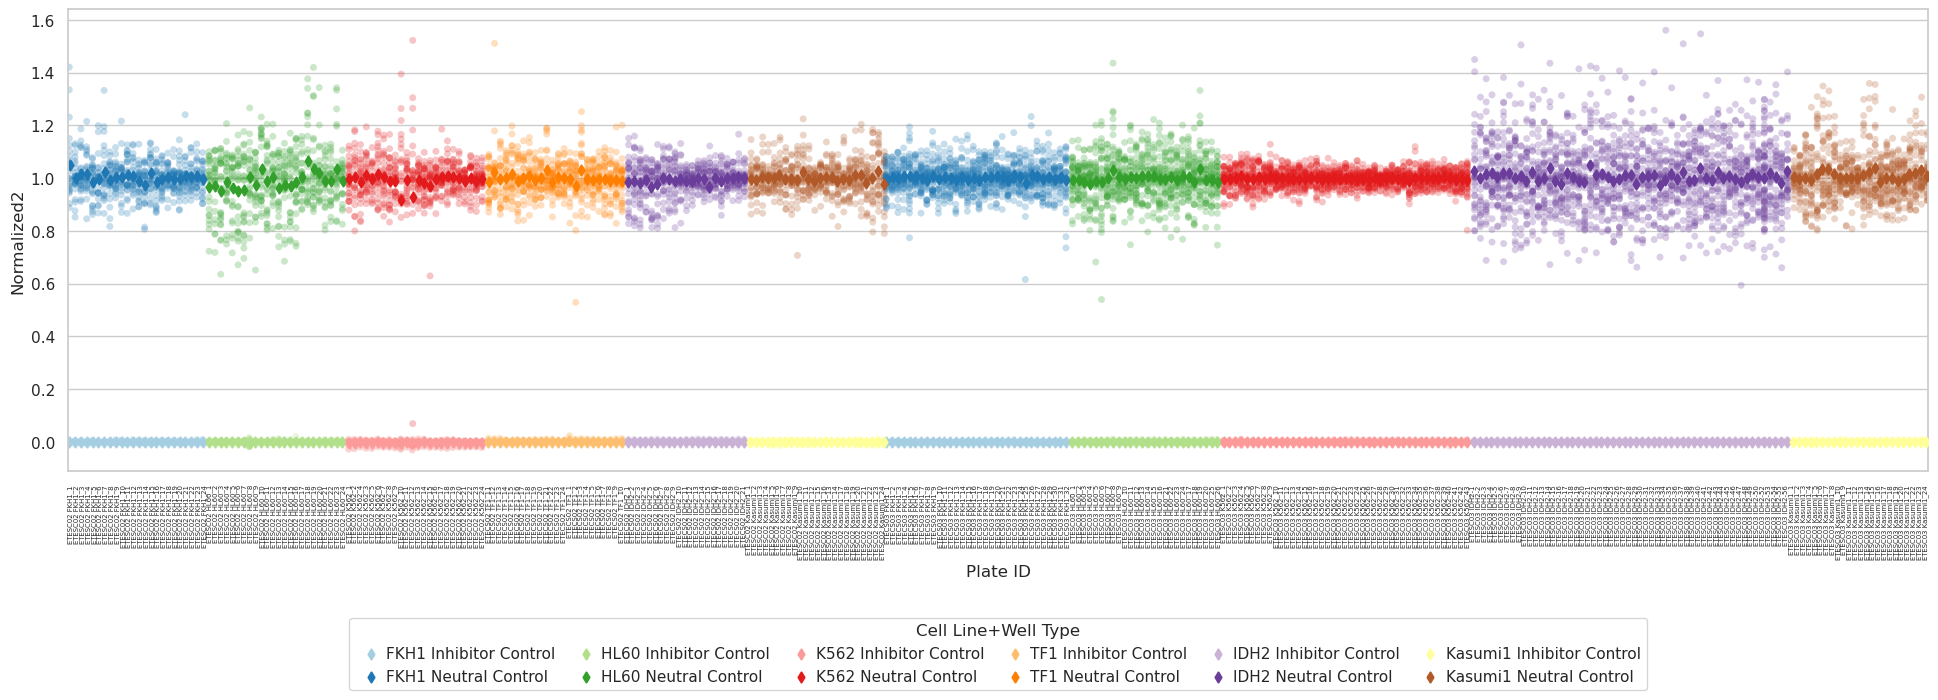

In [36]:
merged['Cell Line+Well Type'] = merged['Cell Line']+' '+merged['Well Type']
controls = merged[(merged['Well Type']=='Inhibitor Control') | (merged['Well Type']=='Neutral Control')]

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(24,6))
sns.stripplot(
    data=controls[['Normalized2','Plate ID', 'Cell Line+Well Type']].reset_index(), x='Plate ID',  y='Normalized2', hue='Cell Line+Well Type', palette='Paired',
    dodge=True, alpha=.25, zorder=1, legend=False, ax=ax)
sns.pointplot(
    data=controls[['Normalized2','Plate ID', 'Cell Line+Well Type']].reset_index(), x='Plate ID', y='Normalized2', hue='Cell Line+Well Type',
    join=False, dodge=.8 - .8 / 3, palette='Paired',
    markers="d", scale=.75, errorbar=None, ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5);
# Improve the legend
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(.5, -0.3), ncol=6, frameon=True, columnspacing=1, handletextpad=0)

#### Reference drug response curves from GDSC2

In [5]:
import zipfile
gdsc = pd.read_csv(PROJECT_PATH / 'data/reference/GDSC2_public_raw_data_24Jul22.csv.zip', compression='zip')
gdsc.head()

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,1,UN-USED,NaN,NaN,0
1,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,2,UN-USED,NaN,NaN,0
2,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,3,UN-USED,NaN,NaN,398
3,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,4,UN-USED,NaN,NaN,796
4,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,5,UN-USED,NaN,NaN,796


In [64]:
select_cell_lines = ['HL-60']# ['K-562', 'HL-60', 'KASUMI-1']
k5 = gdsc[gdsc['CELL_LINE_NAME'].str.contains('|'.join(select_cell_lines))]

In [65]:
select_drugs = {'1009':'ATRA', '1810':'Mito', '134':'VP16', '1813':'FLD', '1006':'AraC', '1008':'MTX', '1909':'ABT199'}
#gdsc['DRUG_ID'] = gdsc['DRUG_ID'].astype('float').astype('Int64').apply(str)
df = gdsc[ gdsc['CELL_LINE_NAME'].str.contains('|'.join(select_cell_lines)) &
           gdsc['DRUG_ID'].str.contains('|'.join(select_drugs.keys()))    ]
df = df.replace({'DRUG_ID':select_drugs})

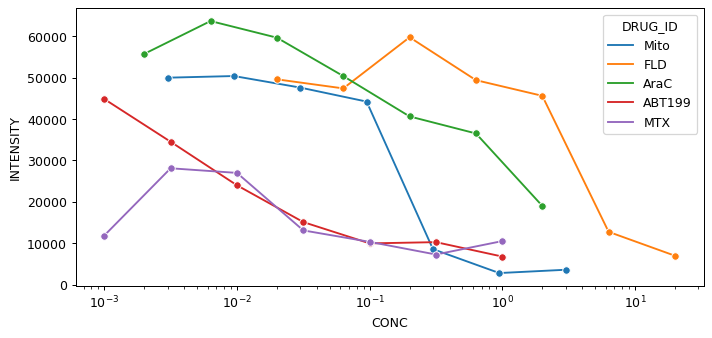

In [66]:
plt.figure(figsize=(9,4), dpi=90)
sns.lineplot(df, x='CONC', y='INTENSITY', hue='DRUG_ID', linestyle='-', marker='o')
plt.xscale('log')
#plt.xlim([0,2.5])